In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tit=pd.read_csv('C:/Users/HP/Downloads/titanic_dataset (1).csv')
tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
tit=tit.set_index('PassengerId')

In [4]:
tit.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
tit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
tit.shape

(891, 11)

In [7]:
tit.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

THERE ARE SOME MISSING VALUES PRESENT IN AGE,CABIN AND EMBARKED

In [8]:
#MISSING VALUES PRESENT IN AGE FILLED BY MEDIAN
tit['Age']=tit['Age'].fillna(tit['Age'].median())
tit.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
# THE NUMBER OF MISSING VALUES IN CABIN IS 687 WHICH IS VERY LARGE.SO WE CAN DROP THE CABIN COLUMN.
tit.drop('Cabin',axis=1,inplace=True)

In [10]:
tit['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [11]:
tit['Embarked']=tit['Embarked'].fillna(tit['Embarked'].mode()[0])

In [12]:
tit.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [13]:
tit['Pclass'].unique()

array([3, 1, 2], dtype=int64)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

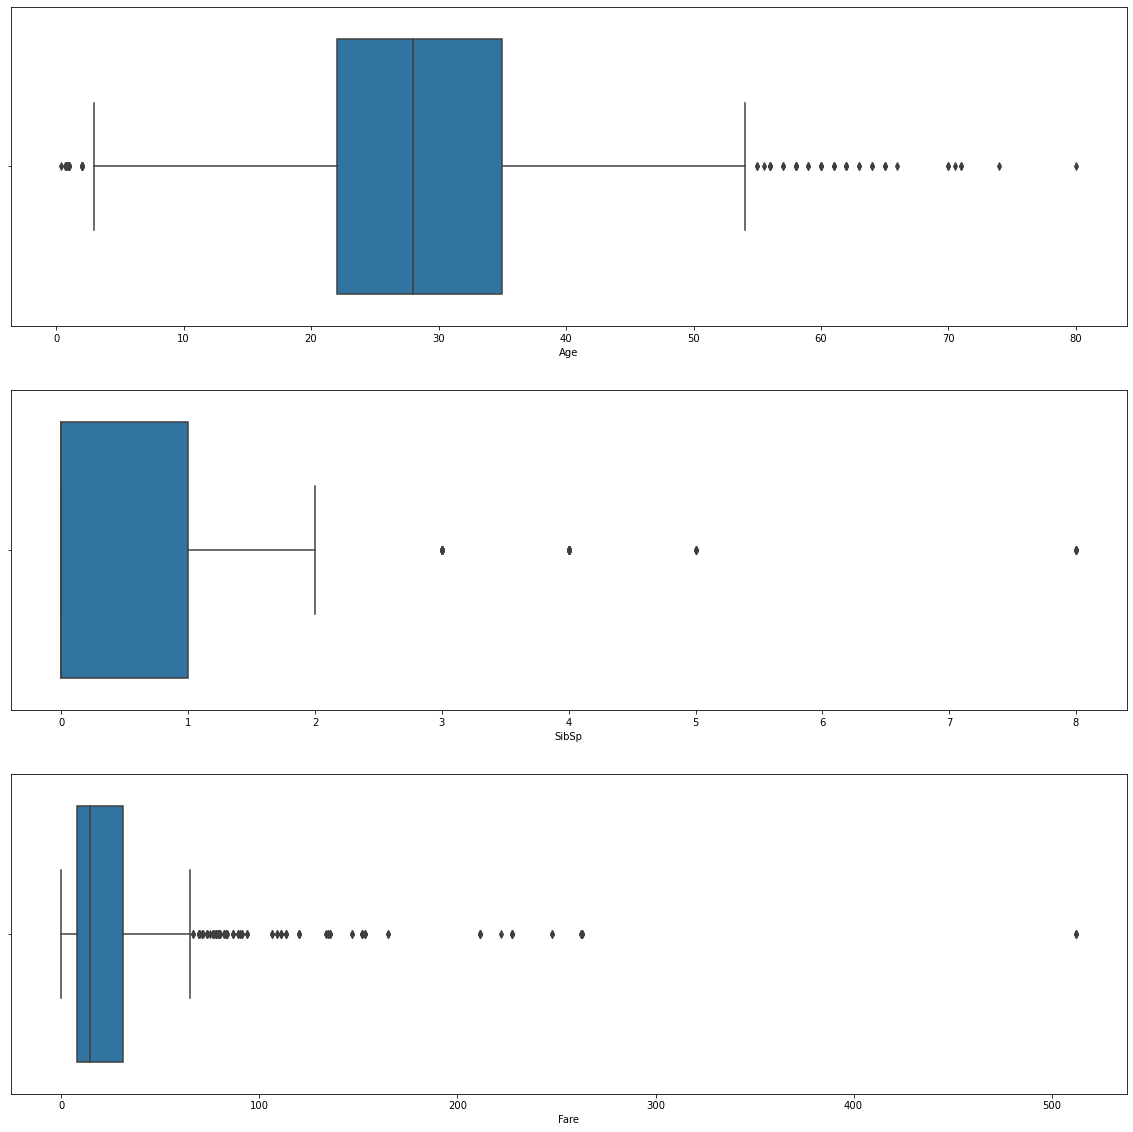

In [14]:
plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
sns.boxplot(tit['Age'])
plt.subplot(3,1,2)
sns.boxplot(tit['SibSp'])
plt.subplot(3,1,3)
sns.boxplot(tit['Fare'])

In [15]:
Q1=np.percentile(tit['Age'],25,interpolation='midpoint')
Q2=np.percentile(tit['Age'],50,interpolation='midpoint')
Q3=np.percentile(tit['Age'],75,interpolation='midpoint')
IQR=Q3-Q1
print("Q1=",Q1)
print("Q2=",Q2)
print("Q3=",Q3)
print("IQR=",IQR)
upp_limit=Q3+1.5*IQR
low_limit=Q1-1.5*IQR
print("UPPER LIMIT=",upp_limit)
print("LOWER LIMIT=",low_limit)
outlier=[]
for i in tit['Age']:
    if ((i>upp_limit)|(i<low_limit)):
        outlier.append(i)
                      
print("OUTLIER= ",outlier)
    

Q1= 22.0
Q2= 28.0
Q3= 35.0
IQR= 13.0
UPPER LIMIT= 54.5
LOWER LIMIT= 2.5
OUTLIER=  [2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


In [16]:
indi=tit[(tit['Age']>upp_limit)|(tit['Age']<low_limit)].index
tit.loc[indi].index


Int64Index([  8,  12,  16,  17,  34,  55,  79,  95,  97, 117, 120, 153, 165,
            171, 173, 175, 184, 196, 206, 233, 253, 269, 276, 281, 298, 306,
            327, 341, 367, 382, 387, 439, 457, 468, 470, 480, 484, 488, 493,
            494, 531, 546, 556, 571, 588, 626, 627, 631, 643, 645, 648, 660,
            673, 685, 695, 746, 756, 773, 789, 804, 825, 828, 830, 832, 852,
            880],
           dtype='int64', name='PassengerId')

In [17]:
tit.drop(indi,inplace=True)

In [18]:
Q1=np.percentile(tit['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(tit['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(tit['SibSp'],75,interpolation='midpoint')
IQR=Q3-Q1
print("Q1=",Q1)
print("Q2=",Q2)
print("Q3=",Q3)
print("IQR=",IQR)
upp_limit=Q3+1.5*IQR
low_limit=Q1-1.5*IQR
print("UPPER LIMIT=",upp_limit)
print("LOWER LIMIT=",low_limit)
outlier=[]
for i in tit['SibSp']:
    if ((i>upp_limit)|(i<low_limit)):
        outlier.append(i)
                      
print("OUTLIER= ",outlier)

Q1= 0.0
Q2= 0.0
Q3= 1.0
IQR= 1.0
UPPER LIMIT= 2.5
LOWER LIMIT= -1.5
OUTLIER=  [3, 3, 4, 5, 3, 4, 5, 3, 3, 8, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 3, 5, 3, 4, 4, 3, 5, 4, 3, 4, 8, 4, 3, 8, 4, 8]


In [19]:
ind=tit[(tit['SibSp']>upp_limit)|(tit['SibSp']<low_limit)].index
tit.loc[ind].index

Int64Index([ 25,  28,  51,  60,  64,  69,  72,  86,  89, 160, 172, 177, 181,
            183, 202, 230, 234, 262, 267, 279, 325, 342, 375, 410, 481, 486,
            542, 543, 635, 684, 687, 727, 788, 793, 814, 820, 847, 851, 864],
           dtype='int64', name='PassengerId')

In [20]:
tit.drop(ind,inplace=True)

In [21]:
tit.shape

(786, 10)

In [22]:
Q1=np.percentile(tit['Fare'],25,interpolation='midpoint')
Q2=np.percentile(tit['Fare'],50,interpolation='midpoint')
Q3=np.percentile(tit['Fare'],75,interpolation='midpoint')
IQR=Q3-Q1
print("Q1=",Q1)
print("Q2=",Q2)
print("Q3=",Q3)
print("IQR=",IQR)
upp_limit=Q3+1.5*IQR
low_limit=Q1-1.5*IQR
print("UPPER LIMIT=",upp_limit)
print("LOWER LIMIT=",low_limit)
outlier=[]
for i in tit['Fare']:
    if ((i>upp_limit)|(i<low_limit)):
        outlier.append(i)
                      
print("OUTLIER= ",outlier)

Q1= 7.8958
Q2= 13.0
Q3= 27.75
IQR= 19.8542
UPPER LIMIT= 57.5313
LOWER LIMIT= -21.885499999999997
OUTLIER=  [71.2833, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 61.175, 63.3583, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 61.3792, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 135.6333, 78.85, 91.0792, 247.5208, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 135.6333, 57.9792, 153.4625, 133.65, 66.6, 134.5, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 59.4, 93.5, 57.9792, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 78.2667, 153.4625, 65.0, 77.9583, 69.3, 76.7292, 73.5, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 65.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 120.0, 93.5, 83.1583, 89.1042, 164.8667]


In [23]:
ind=tit[(tit['Fare']>upp_limit)|(tit['Fare']<low_limit)].index
tit.loc[ind].index

Int64Index([  2,  32,  35,  53,  62,  63,  73,  93,  98, 103,
            ...
            760, 764, 766, 780, 790, 803, 821, 836, 850, 857],
           dtype='int64', name='PassengerId', length=102)

In [24]:
tit.drop(ind,inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

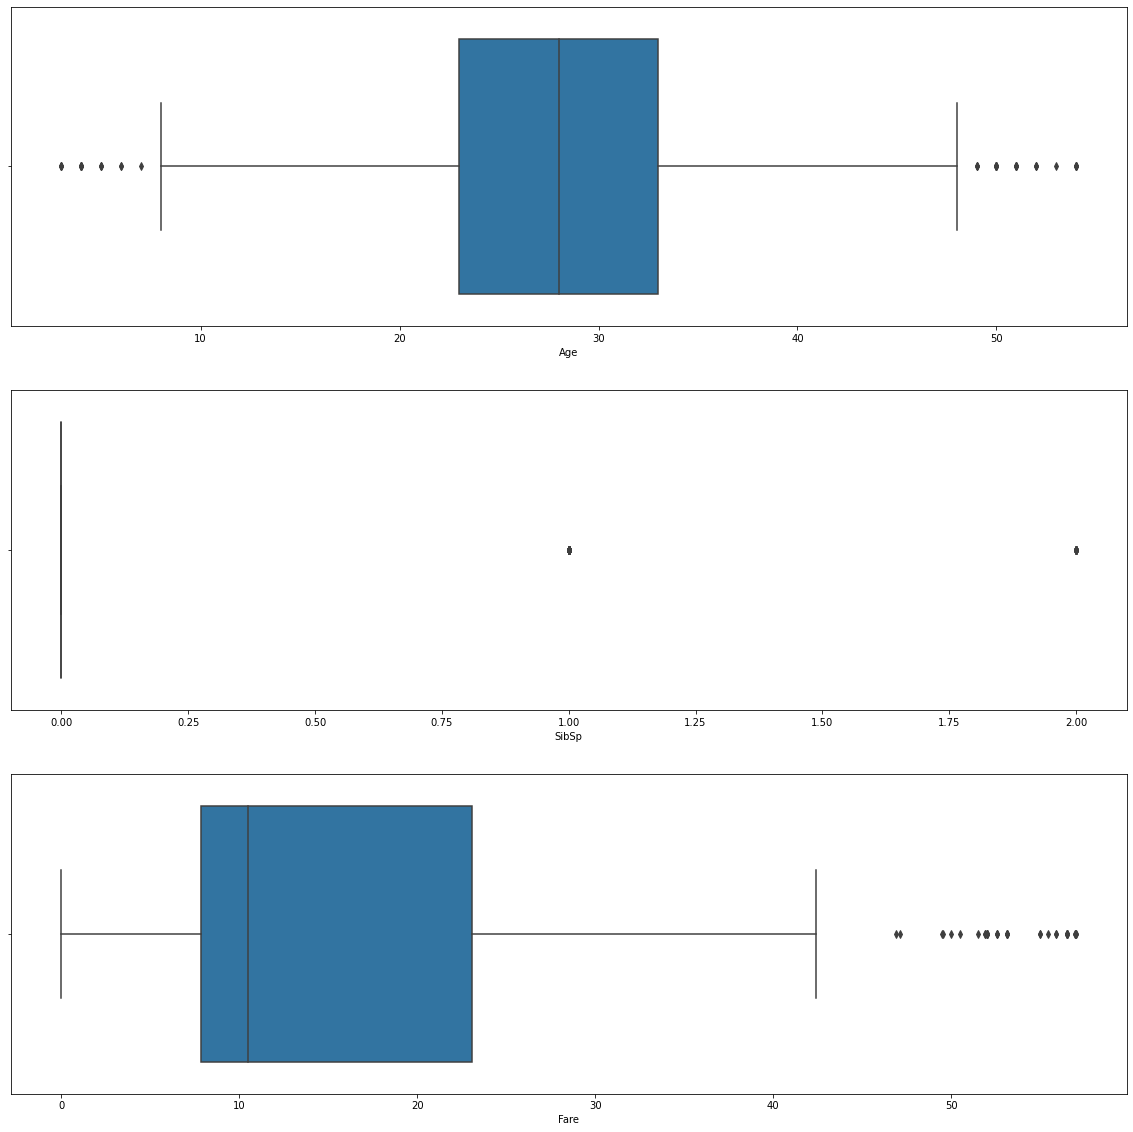

In [25]:
plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
sns.boxplot(tit['Age'])
plt.subplot(3,1,2)
sns.boxplot(tit['SibSp'])
plt.subplot(3,1,3)
sns.boxplot(tit['Fare'])

In [26]:
tit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 684 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  684 non-null    int64  
 1   Pclass    684 non-null    int64  
 2   Name      684 non-null    object 
 3   Sex       684 non-null    object 
 4   Age       684 non-null    float64
 5   SibSp     684 non-null    int64  
 6   Parch     684 non-null    int64  
 7   Ticket    684 non-null    object 
 8   Fare      684 non-null    float64
 9   Embarked  684 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 58.8+ KB


In [27]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
tit['Sex']=le.fit_transform(tit['Sex'])

In [28]:
tit['Ticket']=le.fit_transform(tit['Ticket'])
tit['Embarked']=le.fit_transform(tit['Embarked'])

In [29]:
tit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 684 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  684 non-null    int64  
 1   Pclass    684 non-null    int64  
 2   Name      684 non-null    object 
 3   Sex       684 non-null    int32  
 4   Age       684 non-null    float64
 5   SibSp     684 non-null    int64  
 6   Parch     684 non-null    int64  
 7   Ticket    684 non-null    int32  
 8   Fare      684 non-null    float64
 9   Embarked  684 non-null    int32  
dtypes: float64(2), int32(3), int64(4), object(1)
memory usage: 50.8+ KB


In [30]:
x=tit.drop(['Survived','Name'],axis=1)
x

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,
1,3,1,22.0,1,0,464,7.2500,2
3,3,0,26.0,0,0,582,7.9250,2
4,1,0,35.0,1,0,33,53.1000,2
5,3,1,35.0,0,0,417,8.0500,2
6,3,1,28.0,0,0,232,8.4583,1
...,...,...,...,...,...,...,...,...
887,2,1,27.0,0,0,67,13.0000,2
888,1,0,19.0,0,0,9,30.0000,2
889,3,0,28.0,1,2,588,23.4500,2


In [31]:
y=tit['Survived']

In [32]:
#SPLITTING DATA 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

In [34]:
#MINMAX SCALING
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler(feature_range=(0,1))
x_train=mm.fit_transform(x_train)
x_test=mm.fit_transform(x_test)

In [36]:
#LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred_lm=logit_model.predict(x_test)

In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
print("Accuracy is ",accuracy_score(y_test,y_pred_lm))
print("f1 score is ",f1_score(y_test,y_pred_lm,average='macro'))
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_lm))

Accuracy is  0.8187134502923976
f1 score is  0.7969354529783567
Confusion Matrix 
 [[98 11]
 [20 42]]


In [49]:
#Decesion Tree Algorithm

from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred_dt=dt_model.predict(x_test)

In [50]:
print("Accuracy is ",accuracy_score(y_test,y_pred_dt))
print("f1 score is ",f1_score(y_test,y_pred_dt,average='macro'))
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_dt))

Accuracy is  0.695906432748538
f1 score is  0.6753796728971962
Confusion Matrix 
 [[81 28]
 [24 38]]


In [51]:
#SVM Model

from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred_svm=svm_linear.predict(x_test)

In [52]:
print("Accuracy is ",accuracy_score(y_test,y_pred_svm))
print("f1 score is ",f1_score(y_test,y_pred_svm,average='macro'))
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_svm))

Accuracy is  0.8011695906432749
f1 score is  0.7800393462469735
Confusion Matrix 
 [[95 14]
 [20 42]]


In [54]:
#Random Forest Model

from sklearn.ensemble import RandomForestClassifier
r_forest=RandomForestClassifier()
r_forest.fit(x_train,y_train)
y_pred_rt=r_forest.predict(x_test)

In [55]:
print("Accuracy is ",accuracy_score(y_test,y_pred_rt))
print("f1 score is ",f1_score(y_test,y_pred_rt,average='macro'))
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_rt))

Accuracy is  0.8128654970760234
f1 score is  0.7834757834757835
Confusion Matrix 
 [[101   8]
 [ 24  38]]


In [57]:
#KNN Model

from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbours=np.arange(3,15)
for k in neighbours:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)
acc_values

[0.8128654970760234,
 0.7953216374269005,
 0.7777777777777778,
 0.783625730994152,
 0.7894736842105263,
 0.7777777777777778,
 0.7660818713450293,
 0.7777777777777778,
 0.7953216374269005,
 0.7719298245614035,
 0.783625730994152,
 0.783625730994152]

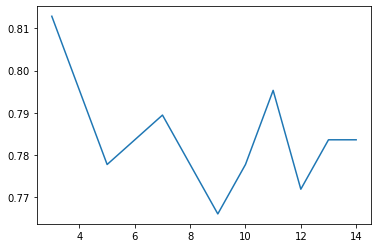

In [58]:
plt.plot(neighbours,acc_values)

In [59]:
classifier=KNeighborsClassifier(n_neighbors=3,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [60]:
print("Accuracy is ",accuracy_score(y_test,y_pred))
print("f1 score is ",f1_score(y_test,y_pred,average='macro'))
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred))

Accuracy is  0.8128654970760234
f1 score is  0.7929782082324455
Confusion Matrix 
 [[96 13]
 [19 43]]


# Naive Bayes Classifier - Guassian method

In [61]:
from sklearn.naive_bayes import GaussianNB
cl=GaussianNB()
cl.fit(x_train,y_train)

GaussianNB()

In [62]:
y_pred_g=cl.predict(x_test)

In [63]:

print("CONFUSION MATRIX =\n",confusion_matrix(y_test,y_pred_g))
print("ACCURACY SCORE =",accuracy_score(y_test,y_pred_g))

CONFUSION MATRIX =
 [[89 20]
 [17 45]]
ACCURACY SCORE = 0.783625730994152


In [64]:
from sklearn.naive_bayes import BernoulliNB
cl=BernoulliNB()
cl.fit(x_train,y_train)

BernoulliNB()

In [65]:
y_pred_b=cl.predict(x_test)

In [66]:
print("CONFUSION MATRIX =\n",confusion_matrix(y_test,y_pred_b))
print("ACCURACY SCORE =",accuracy_score(y_test,y_pred_b))

CONFUSION MATRIX =
 [[95 14]
 [18 44]]
ACCURACY SCORE = 0.8128654970760234


In [67]:
from sklearn.naive_bayes import MultinomialNB
cl=MultinomialNB().fit(x_train,y_train)


In [68]:
y_pred_m=cl.predict(x_test)

In [69]:
print("CONFUSION MATRIX =\n",confusion_matrix(y_test,y_pred_m))
print("ACCURACY SCORE =",accuracy_score(y_test,y_pred_m))

CONFUSION MATRIX =
 [[107   2]
 [ 50  12]]
ACCURACY SCORE = 0.695906432748538


In [71]:
print("Accuracy score of logistic regression model ",accuracy_score(y_test,y_pred_lm))
print("Accuracy score of decision Tree Algorithm ",accuracy_score(y_test,y_pred_dt))
print("Accuracy score of SVM model ",accuracy_score(y_test,y_pred_svm))
print("Accuracy score of Random Forest Model ",accuracy_score(y_test,y_pred_rt))
print("Accuracy score of KNN Model ",accuracy_score(y_test,y_pred))
print("Accuracy score of Guassian Model ",accuracy_score(y_test,y_pred_g))
print("Accuracy score of Bernaulli Model ",accuracy_score(y_test,y_pred_b))
print("Accuracy score of Multinominal Model ",accuracy_score(y_test,y_pred_m))

Accuracy score of logistic regression model  0.8187134502923976
Accuracy score of decision Tree Algorithm  0.695906432748538
Accuracy score of SVM model  0.8011695906432749
Accuracy score of Random Forest Model  0.8128654970760234
Accuracy score of KNN Model  0.8128654970760234
Accuracy score of Guassian Model  0.783625730994152
Accuracy score of Bernaulli Model  0.8128654970760234
Accuracy score of Multinominal Model  0.695906432748538


Since accuracy score is large in logistic regression model. SO It is the best method to fit the given data set